# Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formate = 'retina'

In [3]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/worldbank_gdp_gini_birth_death_suicide_rate.csv'
df = pd.read_csv(url)
df.sample(10)

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
5130,Germany,2016,4.164749e+12,31.9,9.600000,11.100000,13.600000
11022,Pakistan,2008,6.553682e+11,NaN,30.631000,7.804000,NaN
5205,Gibraltar,1973,NaN,NaN,NaN,NaN,NaN
14117,Togo,1976,NaN,NaN,47.992000,16.294000,NaN
13567,Sub-Saharan Africa (excluding high income),2016,3.745424e+12,NaN,36.165125,9.003958,7.539265
14456,Turks and Caicos Islands,1961,NaN,NaN,NaN,NaN,NaN
5960,"Hong Kong SAR, China",1961,NaN,NaN,35.000000,6.100000,NaN
1728,Brunei Darussalam,1977,NaN,NaN,33.852000,6.521000,NaN
2832,"Congo, Rep.",1960,NaN,NaN,42.702000,18.924000,NaN
7063,Jordan,2002,3.515819e+10,37.0,31.248000,4.037000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          15576 non-null  object 
 1   year                                             15576 non-null  int64  
 2   GDP, PPP (current international $)               6726 non-null   float64
 3   Gini index (World Bank estimate)                 1649 non-null   float64
 4   Birth rate, crude (per 1,000 people)             14515 non-null  float64
 5   Death rate, crude (per 1,000 people)             14492 non-null  float64
 6   Suicide mortality rate (per 100,000 population)  1145 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 851.9+ KB


### filter and visualize `country` data

In [6]:
df[df['country'].str.contains('Thailand')].head(10)

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
13983,Thailand,1960,NaN,NaN,42.735,13.180,NaN
13984,Thailand,1961,NaN,NaN,42.617,12.853,NaN
13985,Thailand,1962,NaN,NaN,42.469,12.534,NaN
13986,Thailand,1963,NaN,NaN,42.283,12.226,NaN
13987,Thailand,1964,NaN,NaN,42.041,11.929,NaN
13988,Thailand,1965,NaN,NaN,41.708,11.639,NaN
13989,Thailand,1966,NaN,NaN,41.244,11.346,NaN
13990,Thailand,1967,NaN,NaN,40.625,11.046,NaN
13991,Thailand,1968,NaN,NaN,39.845,10.733,NaN
13992,Thailand,1969,NaN,NaN,38.912,10.408,NaN


In [7]:
x_col='year'
y_col='Death rate, crude (per 1,000 people)'
country='Thailand'

In [8]:
df1=df[df['country']==country].copy()
df1

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
13983,Thailand,1960,NaN,NaN,42.735,13.180,NaN
13984,Thailand,1961,NaN,NaN,42.617,12.853,NaN
13985,Thailand,1962,NaN,NaN,42.469,12.534,NaN
13986,Thailand,1963,NaN,NaN,42.283,12.226,NaN
13987,Thailand,1964,NaN,NaN,42.041,11.929,NaN
13988,Thailand,1965,NaN,NaN,41.708,11.639,NaN
13989,Thailand,1966,NaN,NaN,41.244,11.346,NaN
13990,Thailand,1967,NaN,NaN,40.625,11.046,NaN
13991,Thailand,1968,NaN,NaN,39.845,10.733,NaN
13992,Thailand,1969,NaN,NaN,38.912,10.408,NaN


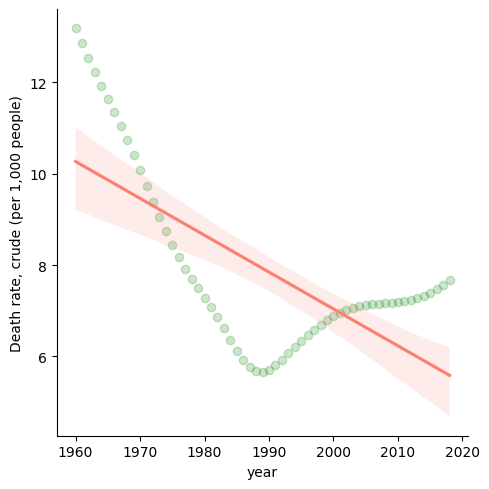

In [10]:
sns.lmplot(x=x_col, y=y_col, data=df1, fit_reg=True,
          scatter_kws={'alpha': .2,'color':'green'},
          line_kws={'color':'salmon'});

In [11]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [12]:
X=df1[[x_col]]
y=df1[y_col]

In [14]:
X[:3]

,year
13983,1960
13984,1961
13985,1962


In [17]:
y[:3]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21908\721213638.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y[:3]


13983    13.180
13984    12.853
13985    12.534
Name: Death rate, crude (per 1,000 people), dtype: float64

In [18]:
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=test_size,
                                                   random_state=1)

### linear regression
`simple regression model`
$$
\hat{y}=\beta_{0}+\beta_{1}x+\varepsilon
$$

In [19]:
lm = LinearRegression()
lm

LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
lm.score(X_train,y_train) # R-squared

0.4353052622557835

In [22]:
lm.coef_

array([-0.07661316])

In [23]:
lm.intercept_

160.27616227662946

In [24]:
lm.score(X_test,y_test) # R-squared

0.5856015176097809

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

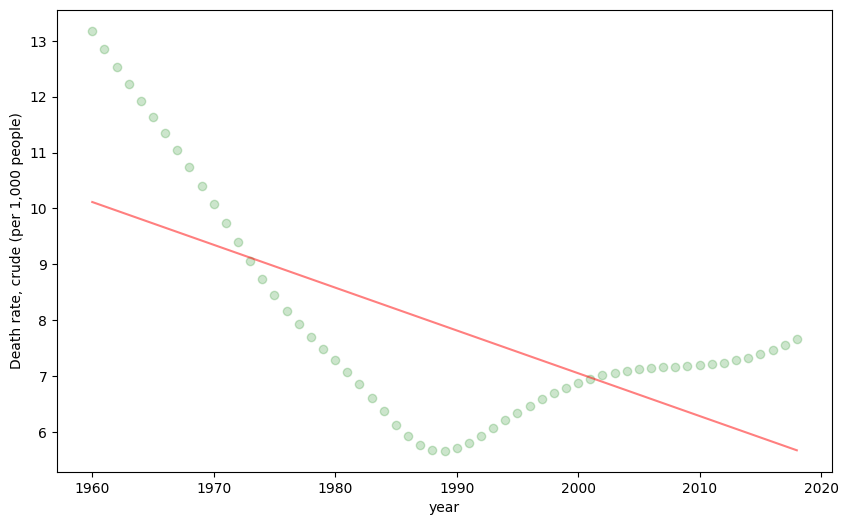

In [25]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X,y,color='green',alpha=.2)
plt.plot(X, lm.predict(X), color='red',alpha=.5)
plt.xlabel(x_col)
plt.ylabel(y_col)

In [28]:
lm.predict([[1990],
            [2021]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.81597278, 5.44096481])

### Polynomial regression
`Simple Linear Regression`
$$
y=\beta_{0}+\beta_{1}x+\varepsilon
$$

`General polynomial regression model`
$$
y=\beta_{0}+\beta_{1}x^1+\beta_{2}x^2+\beta_{3}x^3+{...}+\beta_{n}x^n+\varepsilon
$$


#### Understand fundamental Polynomial regresion

In [29]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit_transform([[1990]])

array([[1.0000e+00, 1.9900e+03, 3.9601e+06]])

In [30]:
v = 1990
v**0, v**1, v**2

(1, 1990, 3960100)

### Take action Polynomial Regression

In [32]:
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [33]:
X_train_poly[:3]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06]])

In [24]:
pm = LinearRegression()
pm.fit(X_train_poly, y_train)

NameError: name 'X_train_poly' is not defined

In [36]:
pm.score(X_train_poly, y_train)

0.9448282949367037

In [37]:
pm.intercept_

21619.43539756367

In [38]:
pm.coef_

array([ 0.00000000e+00, -2.16491346e+01,  5.42121601e-03])

In [39]:
pm.score(X_test_poly, y_test)

0.9491064757890537

In [40]:
X_train[:3]

,year
14019,1996
14023,2000
14007,1984


In [41]:
X_train_poly[:3]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06]])

In [42]:
pm.intercept_ + sum((pm.coef_ * X_train_poly[0]))

5.974124829725042

In [43]:
pm.predict(X_train_poly[:3])

array([5.97412483, 6.0303033 , 6.84646291])

In [46]:
print(pm.predict(poly_reg.fit_transform([[1996]])))
print(pm.predict(poly_reg.fit_transform([[1996],[2000],[1984]])))

[5.97412483]
[5.97412483 6.0303033  6.84646291]


In [53]:
# Create function for predict
def predict(intercept, coef, x):
    v=intercept
    for p in range(len(coef)):
        v += x ** p * coef[p]
    return v.round(4)

# Use function for predict
predict(pm.intercept_, pm.coef_, 2000)

6.0303

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

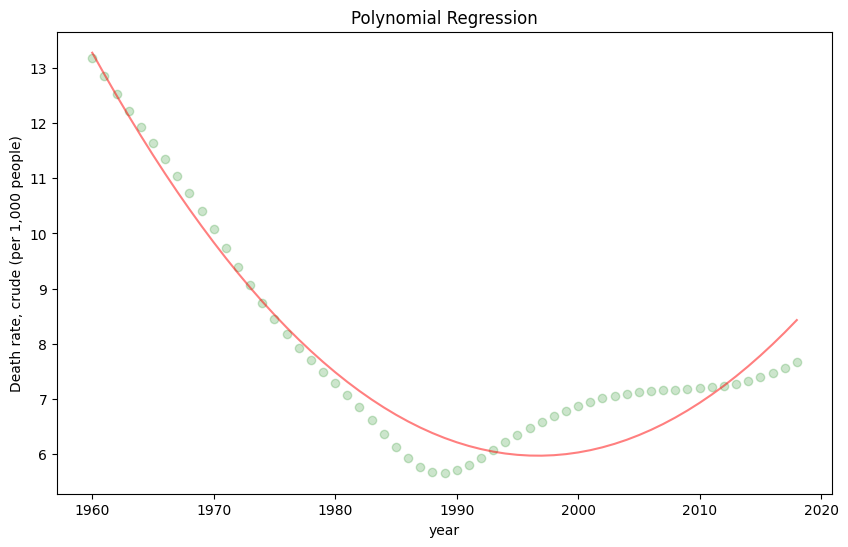

In [56]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X,y, color='green', alpha=.2)
plt.plot(X, pm.predict(poly_reg.fit_transform(X)), color='red', alpha=.5)
plt.title('Polynomial Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

# Multiple Polynomial Regression (Automoblie dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formate = 'retina'

In [2]:
print(f'seaborn version: {sns.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
# print(f'matplotlib version: {plt.__version__}')

seaborn version: 0.12.1
pandas version: 1.5.2
numpy version: 1.23.4


In [3]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/ISLR/Auto.csv'
df=pd.read_csv(url, na_values='?')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
213,13.0,8,350.0,145.0,4055,12.0,76,1,chevy c10
62,13.0,8,350.0,165.0,4274,12.0,72,1,chevrolet impala
342,30.0,4,135.0,84.0,2385,12.9,81,1,plymouth reliant
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
179,22.0,4,121.0,98.0,2945,14.5,75,2,volvo 244dl
82,23.0,4,120.0,97.0,2506,14.5,72,3,toyouta corona mark ii (sw)
279,29.5,4,98.0,68.0,2135,16.6,78,3,honda accord lx
314,26.4,4,140.0,88.0,2870,18.1,80,1,ford fairmont
207,20.0,4,130.0,102.0,3150,15.7,76,2,volvo 245
60,20.0,4,140.0,90.0,2408,19.5,72,1,chevrolet vega


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [5]:
df.dropna(inplace=True)

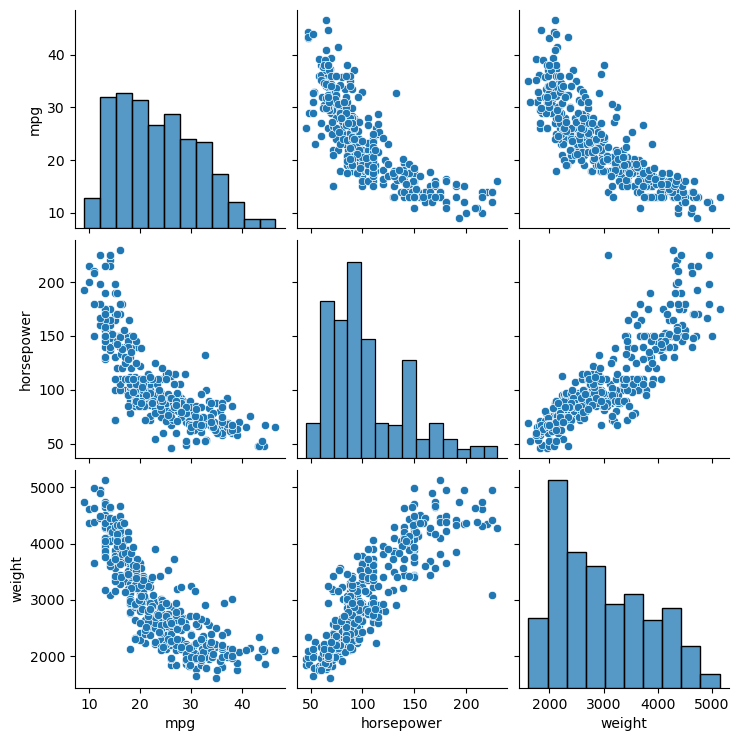

In [7]:
# dataAuto1 = df[['mpg','horsepower','weight']]
sns.pairplot(df[['mpg','horsepower','weight']])

In [9]:
dataAuto1 = df[['mpg','horsepower','weight']]
dataAuto1.corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.832244
horsepower,-0.778427,1.000000,0.864538
weight,-0.832244,0.864538,1.000000


# Scikit-Learn

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [11]:
x_col = ['horsepower','weight']
y_col = 'mpg'

In [14]:
X=df[x_col]
y=df[y_col]

In [15]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=test_size,
                                                   random_state=1)

## Linear Regression
`multiple regression model`

$$
y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\varepsilon
$$

In [22]:
lm = LinearRegression()
lm
print(lm.fit(X_train,y_train),'\n')
print('intercept:', lm.intercept_.round(5),'\n')
print('coef:', lm.coef_,'\n')

# R-squared
print('---R-squared---')
print('Train:', lm.score(X_train, y_train).round(5),'\n')
print('Test:', lm.score(X_test,y_test).round(5),'\n')

LinearRegression() 

intercept: 44.82247 

coef: [-0.04898144 -0.00553451] 

---R-squared---
Train: 0.69324 

Test: 0.72925 



### Polynomial regression
`multiple Linear Regression`
$$
y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\varepsilon
$$

`General polynomial regression model`
$$
y=\beta_{0}+\beta_{1}x^1+\beta_{2}x^2+\beta_{3}x^3+...+\beta_{n}x^n+\varepsilon
$$

In [44]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

pm = LinearRegression()
pm.fit(X_train_poly, y_train)

LinearRegression()

In [45]:
poly.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [46]:
print(X_train_poly[:3],'\n')
print(X_train[:3])

[[1.0000e+00 8.8000e+01 2.5000e+03 7.7440e+03 2.2000e+05 6.2500e+06]
 [1.0000e+00 8.2000e+01 2.7200e+03 6.7240e+03 2.2304e+05 7.3984e+06]
 [1.0000e+00 5.2000e+01 2.1300e+03 2.7040e+03 1.1076e+05 4.5369e+06]] 

     horsepower  weight
335        88.0    2500
396        82.0    2720
393        52.0    2130


In [47]:
poly.get_feature_names()

C:\Users\ASUS\miniconda3\envs\nut3.10\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [48]:
# intercept & coef
print('intercept:', pm.intercept_.round(5),'\n')
print('coef:', pm.coef_,'\n')

# R-squared
print('>>>R-squared<<<')
print('Train:', pm.score(X_train_poly, y_train).round(5),'\n')
print('Test:', pm.score(X_test_poly,y_test).round(5),'\n')

intercept: 60.99964 

coef: [ 0.00000000e+00 -2.71309036e-01 -8.77290010e-03  2.15169279e-04
  4.22566829e-05 -3.58954388e-08] 

>>>R-squared<<<
Train: 0.73446 

Test: 0.77346 



In [57]:
print('Polynomial predict:',pm.intercept_ + sum(pm.coef_ + X_test_poly[0]),'\n')
print('Linear predict:', lm.predict(X_test[:3]),'\n')
# pm.intercept_ + sum(pm.coef_ + X_test_poly[0])

Polynomial predict: 6535191.719813573 

Linear predict: [26.20179173 29.13344391 28.14276685] 



6535191.719813573

In [52]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [54]:
y_test[:3]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22676\3135146844.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:3]


82     23.0
167    29.0
356    32.4
Name: mpg, dtype: float64

## pipeline

In [58]:
from sklearn.pipeline import make_pipeline
degree=2
pm2=make_pipeline(PolynomialFeatures(degree), LinearRegression(), verbose=True)
pm2.fit(X_train, y_train)

[Pipeline]  (step 1 of 2) Processing polynomialfeatures, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   0.0s


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())],
         verbose=True)

In [59]:
pm2.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())],
         verbose=True)>

In [63]:
# R-squared
print('>>>R-squared<<<')
print('Train:', pm2.score(X_train,y_train))
print('Test:', pm2.score(X_test,y_test))


>>>R-squared<<<
Train: 0.7344640327916465
Test: 0.7734567578489351


In [65]:
pm2.predict([
    [97,2500],
    [92,2202]
])

C:\Users\ASUS\miniconda3\envs\nut3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([24.79783823, 26.92895146])